In [1]:
!pip install opencv-python-headless

In [2]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def round_value(rho):

    '''
        round_value : 
                rho :  The decimal rho value to be rounded up or down based on the proximity to closest integer.
                return integer value
    '''

    if (int(rho)+1) - rho > 0.5:
        return int(rho)
    else:
        return int(rho)+1

In [4]:
def get_index(x,y):

    '''
        get_Index: 

                x: List that stores theta and rho unsigned indexes to be converted to signed indexes. [1*2]
                y: List that stores the range of theta and rho (Polar_range) [1*2] 

                return list with signed indexes.
    '''
    index = []
    
    for i in range(2):
    
        temp = y[i] - x[i]
        if temp > y[i]:
            index.append(temp)
        else:
            index.append(x[i])

    return index

In [33]:
def get_rho(polar_range,accumulator,cord0,cord1,cos_t,sin_t):
    '''
        get_rho:
            polar_range : Range of rho and theta values [1*2]
            accumulator : Counter matrix to store occurences of rho,theta pairs [2*polar_ranges[0,1]+1]
            cord0       : X co-ordinate value
            cord1       : Y co-ordinate value
            cos_t,sine_t: Reusable values of cosine and sine   
    '''

    for theta in range(-polar_range[1],polar_range[1]+1):

        radian = math.radians(theta)
        rho    = round_value( (cord0*cos_t[theta+90]) + (cord1*sin_t[theta+90]) )
        #print(rho,theta)
        if  (-(polar_range[0]+1)) < rho < (polar_range[0]+1):
            index  = get_index([rho,theta],polar_range)
            accumulator[index[0]][index[1]] += 1 
        else:
            pass

    return accumulator

In [29]:
def array_index(acc,polar_range):

    value = []
    index = []
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):

            if acc[i][j]>1400:
                index.append(get_index([i,j],polar_range))
                value.append(acc[i][j])

    return index,value

In [8]:
image = cv2.imread("a.jpg")

edge_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edge_image = cv2.GaussianBlur(edge_image,(5,5),0)
edge_image = cv2.Canny(edge_image,100,150)

edge_image = cv2.dilate(edge_image,cv2.getStructuringElement(cv2.MORPH_RECT,(8,8)),iterations =1)
edge_image = cv2.erode(edge_image,cv2.getStructuringElement(cv2.MORPH_RECT,(7,7)),iterations =1)
# edge_image = cv2.dilate(edge_image,cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)),iterations =1)

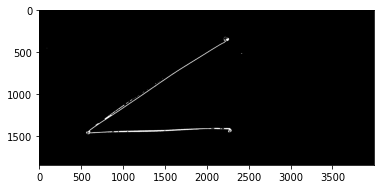

In [9]:
plt.imshow(edge_image,cmap='gray')
plt.show()

In [10]:
edge_image1 = np.divide(edge_image,255)

In [11]:
height,width = edge_image1.shape
diagonal = int(np.ceil((np.sqrt(height**2+width**2))))

In [15]:
polar_ranges = [diagonal,90]
acc = np.zeros([2*polar_ranges[0]+1,2*polar_ranges[1]+1],dtype = int)

In [16]:
thetas = np.deg2rad(np.arange(-90.0, 91.0))

cosine_t = np.cos(thetas)
sine_t = np.sin(thetas)

In [17]:
x,y = np.nonzero(edge_image1)

for i in range(len(x)):
    
    acc = get_rho(polar_ranges,acc,x[i],y[i],cosine_t,sine_t)

In [30]:
c,v = array_index(acc,polar_ranges)

In [31]:
c

[[1477, 2],
 [1478, 2],
 [1479, 2],
 [1480, 2],
 [1481, 2],
 [1482, 2],
 [1483, 2],
 [1524, 34],
 [1525, 34]]

In [32]:
v

[1441, 1501, 1492, 1519, 1561, 1620, 1506, 1414, 1431]